In [ ]:
!pip install numpy==1.23.5

In [ ]:
!pip install pandas
!pip install statsmodels

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts

In [ ]:
df=pd.read_csv('/content/TB Dataset 2024.csv',index_col=0,parse_dates=True)
X = df['Cases'].values
df['Cases'] = pd.to_numeric(df['Cases'], errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Cases'], inplace=True)
df['Cases'] = df['Cases'].astype(float)
print('Shape of data \t',df.shape)
print('Original Dataset:\n',df.head())


print('After Extracting only Cases:\n',X)

Shape of data 	 (90, 1)
Original Dataset:
            Cases
Months          
Jan-17  144781.0
Feb-17  147133.0
Mar-17  176283.0
Apr-17  160671.0
May-17  161146.0
After Extracting only Cases:
 [144781 147133 176283 160671 161146 147705 144041 135239 130291 126237
 131882 129434 149393 152119 177442 193912 206750 190644 184647 169828
 169394 179379 160726 166612 195596 193142 211868 221100 222455 203098
 212255 188278 194154 186196 193955 179260 196997 213699 169171  83647
 120737 157328 140868 121820 140813 150480 141548 174598 183398 189377
 203648 134825  92827 176007 207751 199885 207685 188803 174757 184173
 161898 188081 228814 220166 222469 223496 207715 195197 200045 159075
 191940 185962 183860 199998 220188 214315 232354 218816 213483 216198
 209286 206384 193287 206825 200214 225315 229494 232433 246303 221523]


<ipython-input-4-f7bdbeb0ade8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/content/TB Dataset 2024.csv',index_col=0,parse_dates=True)


In [ ]:
import seaborn as sns

# Set black, gray, and white theme
plt.style.use('grayscale')  # Converts plots to grayscale
sns.set_style("darkgrid")  # Apply a dark grid background

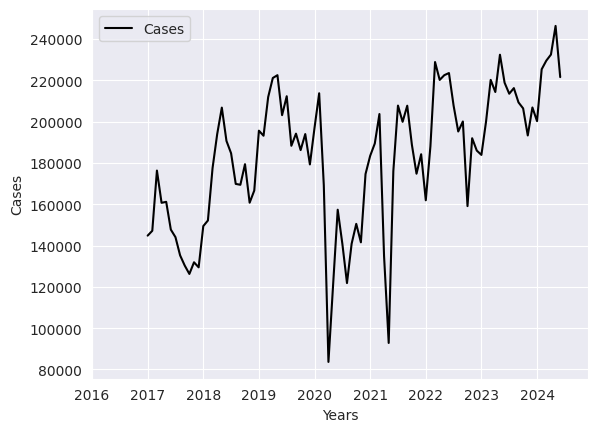

In [ ]:
X = df['Cases'].values
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index, format='%b-%y')
#df.index = pd.to_datetime(df.index)


# Plot the data
ax = df.plot(y='Cases', legend=True)

# Set x-axis limits from 2017 to 2024
ax.set_xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2024-12-31'))

# Label axes
plt.xlabel("Years")
plt.ylabel("Cases")

# Show the plot
plt.show()


In [ ]:
# Perform the BDS test
bds_statistic, p_value = ts.bds(df['Cases'])
critical_value = 1.96
# Access the BDS statistic directly (no indexing needed)
if abs(bds_statistic) > critical_value:
    print(f"BDS Statistic: {bds_statistic}")
    print("Reject the null hypothesis of independence (IID)")
else:
    print(f"BDS Statistic: {bds_statistic}")
    print("Fail to reject the null hypothesis of independence (IID)")
print("p_value:",p_value)

BDS Statistic: 14.708913531815606
Reject the null hypothesis of independence (IID)
p_value: 5.6507372530065715e-49


In [ ]:
def bds(x, max_dim=2, epsilon=None, distance=1.5):
  x = array_like(x, 'x', ndim=1)
  nobs_full = len(x)

  if max_dim < 2 or max_dim >= nobs_full:
      raise ValueError("Maximum embedding dimension must be in the range"
                         " [2,len(x)-1]. Got %d." % max_dim)

  # Cache the indicators
  indicators = distance_indicators(x, epsilon, distance)

  # Get estimates of m-dimensional correlation integrals
  corrsum_mdims = correlation_sums(indicators, max_dim)

  # Get variance of effect
  variances, k = _var(indicators, max_dim)
  stddevs = np.sqrt(variances)

  bds_stats = np.zeros((1, max_dim - 1))
  pvalues = np.zeros((1, max_dim - 1))
  for embedding_dim in range(2, max_dim+1):
      ninitial = (embedding_dim - 1)
      nobs = nobs_full - ninitial

    # Get estimates of 1-dimensional correlation integrals
    # (see Kanzler footnote 10 for why indicators are truncated)
      corrsum_1dim, _ = correlation_sum(indicators[ninitial:, ninitial:], 1)
      corrsum_mdim = corrsum_mdims[0, embedding_dim - 1]

        # Get the intermediate values for the statistic
      effect = corrsum_mdim - (corrsum_1dim**embedding_dim)
      sd = stddevs[0, embedding_dim - 2]

        # Calculate the statistic: bds_stat ~ N(0,1)
      bds_stats[0, embedding_dim - 2] = np.sqrt(nobs) * effect / sd

        # Calculate the p-value (two-tailed test)
      pvalue = 2*stats.norm.sf(np.abs(bds_stats[0, embedding_dim - 2]))
      pvalues[0, embedding_dim - 2] = pvalue

  return np.squeeze(bds_stats), np.squeeze(pvalues)

In [ ]:
print("BDS Statistic:", bds_statistic)
print("P-Value:", p_value)

BDS Statistic: 14.708913531815606
P-Value: 5.6507372530065715e-49


In [ ]:
# Generate descriptive statistics for the numerical column(s)
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
               Cases
count      90.000000
mean   182744.688889
std     33479.977286
min     83647.000000
25%    160684.750000
50%    188540.500000
75%    207707.500000
max    246303.000000


In [ ]:
# Calculate the total number of TB cases
total_cases = df['Cases'].sum()
print("Total number of TB cases:", total_cases)

Total number of TB cases: 16447022.0


In [ ]:
df = pd.DataFrame(df, index=df.index, columns=['Cases'])

In [ ]:
decomposition = seasonal_decompose(df['Cases'], model='additive', period=12)

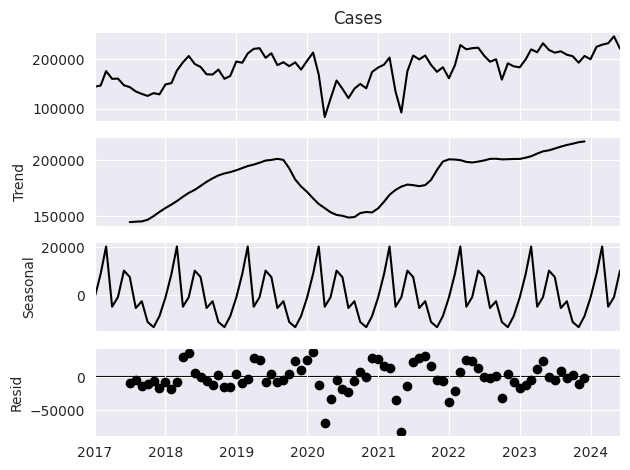

In [ ]:
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Cases'], autolag="AIC")
print("1. Test Statistics:", dftest[0])
print("2. P-Value:", dftest[1])
print("3. Num of Lags:", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical Values Calculation:", dftest[3])
print("5.Critical Values:")
for key, val in dftest[4].items():
  print("\t", key, ":", val)

1. Test Statistics: -2.4469129268196808
2. P-Value: 0.1289308165715944
3. Num of Lags: 2
4. Num of Observations Used For ADF Regression and Critical Values Calculation: 87
5.Critical Values:
	 1% : -3.5078527246648834
	 5% : -2.895382030636155
	 10% : -2.584823877658872


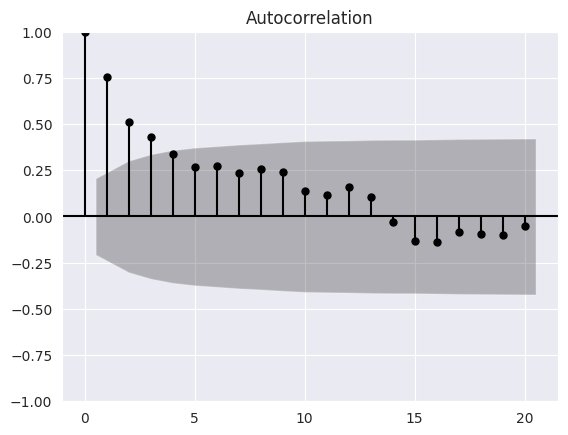

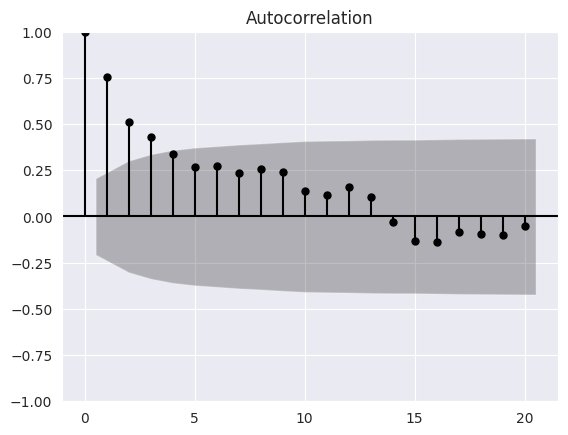

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Cases'])

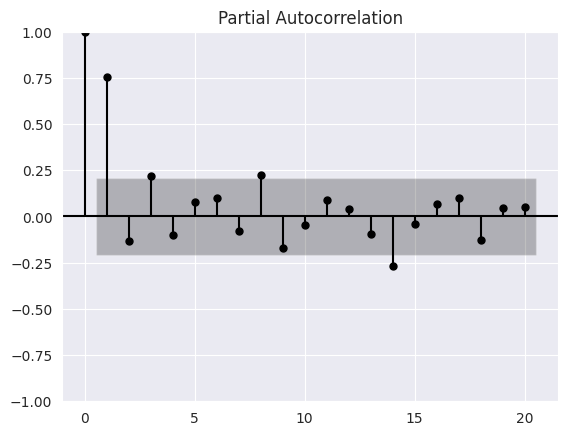

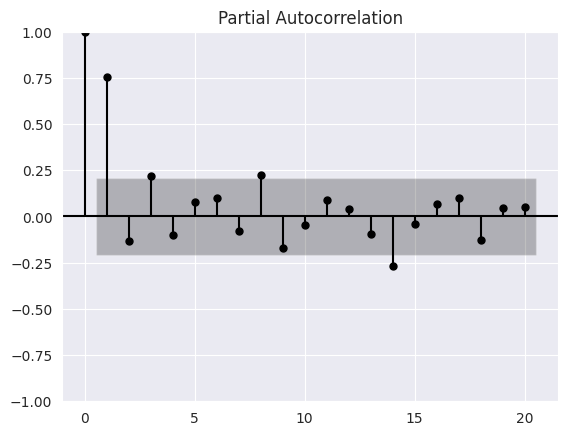

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Cases'])

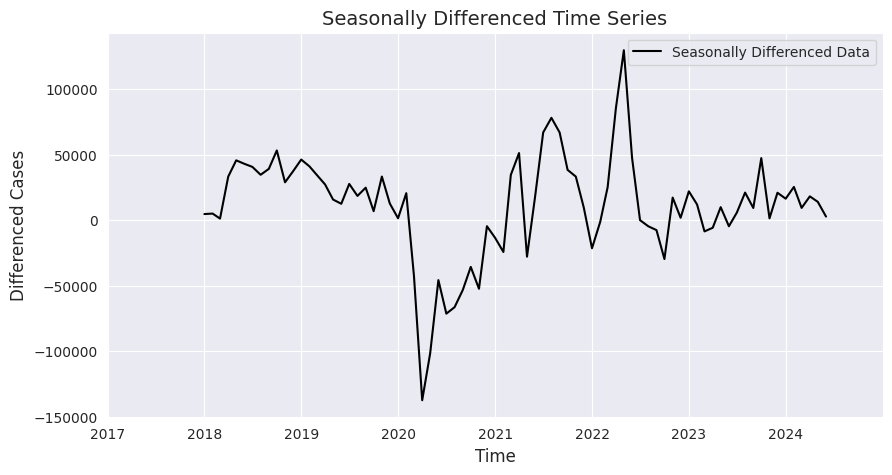

In [ ]:
# Compute seasonally differenced data
seasonal_diff = df['Cases'].diff(12).dropna()

# Plot the differenced data
plt.figure(figsize=(10, 5))  # Adjusted for better readability
plt.plot(seasonal_diff, label='Seasonally Differenced Data')

# Title and labels
plt.title('Seasonally Differenced Time Series', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Differenced Cases', fontsize=12)

# Adjust x-axis tick labels
plt.xticks(rotation=360)  # Rotate x-axis labels for better readability
plt.gca().tick_params(axis='x', which='major', labelsize=10)  # Adjust tick label size

# Adjust y-axis ticks
plt.yticks(fontsize=10)
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2024-12-31'))
# Display legend
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(seasonal_diff, autolag="AIC")
print("1. Test Statistics:", dftest[0])
print("2. P-Value:", dftest[1])
print("3. Num of Lags:", dftest[2])
print("4. Num of Observations Used For ADF Regression and Critical Values Calculation:", dftest[3])
print("5.Critical Values:")
for key, val in dftest[4].items():
  print("\t", key, ":", val)

1. Test Statistics: -3.494556861339793
2. P-Value: 0.008127990750765222
3. Num of Lags: 0
4. Num of Observations Used For ADF Regression and Critical Values Calculation: 77
5.Critical Values:
	 1% : -3.518281134660583
	 5% : -2.899878185191432
	 10% : -2.5872229937594873


In [ ]:
!pip install pmdarima==2.0.3

In [ ]:
import pmdarima

In [ ]:
train=X[0:72]
test=X[72:len(X)]

In [ ]:
from pmdarima.arima import auto_arima

model = auto_arima(train, trace=True,m=12, error_action='ignore', suppress_warnings=True)
model.fit(train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1657.326, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1700.683, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1655.823, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1668.777, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1946.838, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1654.977, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1654.590, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1656.092, Time=0.35 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1655.133, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1657.111, Time=0.30 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1701.725, Time=0.04 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1655.207, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1654.086, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1654.387, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=1655.848, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1655.378, Time=0.28 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1653.850, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1655.253, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=1656.910, Time=1.77 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1668.953, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1656.005, Time=0.24 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=1654.187, Time=0.16 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1702.677, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=1663.954, Time=0.09 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1656.269, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1656.113, Time=0.22 sec
 ARIMA(1,0,1)(1,0,0)[12]             : AIC=1669.286, Time=0.13 sec

Best model:  ARIMA(1,0,1)(1,0,0)[12] intercept
Total fit time: 6.530 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   72
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -821.925
Date:                             Tue, 25 Mar 2025   AIC                           1653.850
Time:                                     13:52:46   BIC                           1665.234
Sample:                                          0   HQIC                          1658.382
                                              - 72                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.076e+04   2.21e+04      2.750      0.006    1.74e+04    1.04e+05
ar.L1          0.5722      

In [ ]:
import statsmodels.api as sm

sarima_mod = sm.tsa.statespace.SARIMAX(train, order=(1,0,1), trend = 'n', seasonal_order =(1,0,0,12))
sarima_fit = sarima_mod.fit(disp=False, outer_iter=400)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: outer_iter. After release 0.14, this will raise.
  warnings.warn(


In [ ]:
residuals = sarima_fit.resid
time = range(len(residuals))

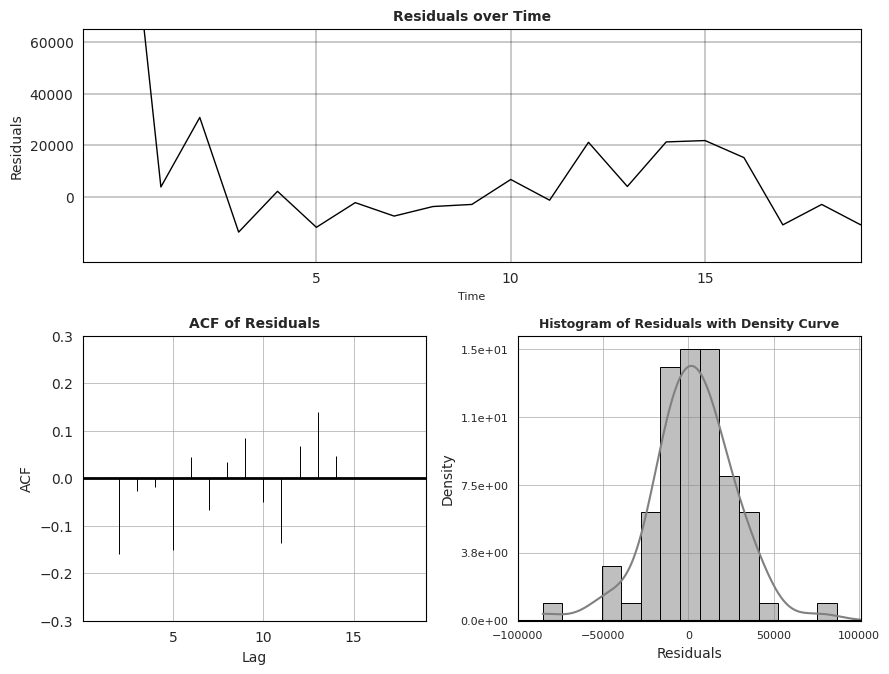

In [ ]:
#Function to create plots with an expanded first graph
def plot_residual_analysis(figsize=(9, 15)):
    fig = plt.figure(figsize=figsize)
    fig.patch.set_facecolor('white')

 # Create grid layout: (3 rows, 2 columns)
    gs = fig.add_gridspec(3, 2, height_ratios=[9, 11, 11])  # First row larger

    # Residuals over time (spanning both columns in first row)
    ax1 = fig.add_subplot(gs[0, :])  # Spans across both columns
    ax1.plot(time, residuals, color='black', linewidth=1.0)
    ax1.set_facecolor('white')
    ax1.set_title("Residuals over Time", fontsize=10,fontweight='bold')
    ax1.set_xlabel("Time", fontsize=8)
    ax1.set_ylabel("Residuals", fontsize=10)
    ax1.set_xticks(np.arange(5, max(time) + 5, 5))  # X-axis in steps of 5
    ax1.set_yticks(np.arange(0, max(residuals) + 2000, 20000))  # Y-axis in steps of 20000
    #ax1.set_xticks([5, 10, 15])
    #ax1.set_yticks([2000, 4000, 6000])
     # Adjust axis limits for better visualization
    #ax1.set_xlim(0, max(time) + 1)
    #ax1.set_ylim(min(residuals) - 5000, max(residuals) + 5000)
    ax1.set_xlim(-1, 19)  # Zooming effect by adjusting x-axis range
    ax1.set_ylim(-25000, 65000)  # Zooming effect by adjusting y-axis range
    #ax1.grid(True, linestyle='-', linewidth=0.5, color='dimgray')
    ax1.grid(True, linestyle='-', linewidth=0.3, color='black')
  # Adjust thickness of the border
    # ACF of Residuals
   # ax2 = fig.add_subplot(gs[1, 0])
    #sm.graphics.tsa.plot_acf(residuals, ax=ax2, color='black')
    #ax2.set_facecolor('white')
    #ax2.set_title("ACF of Residuals", fontsize=12)
    #ax2.set_xlabel("Lag", fontsize=10)
    #ax2.set_ylabel("ACF", fontsize=10)
    #ax2.set_ylim(-0.50, 0.50)  # Set y-axis limits from -0.50 to 0.50
    #ax2.set_xlim(0, 15)
    #ax2.grid(True, linestyle='--', linewidth=0.1)

    # ACF of Residuals (with larger size and only lines)
    ax2 = fig.add_subplot(gs[1, 0])  # ACF spans across both columns
    lags = np.arange(0, 15)  # Define lags
    acf_values = sm.tsa.stattools.acf(residuals, nlags=14)  # Compute ACF

     # Compute critical values at 95% confidence level
    n = len(residuals)
    conf_interval = 1.96 / np.sqrt(n)

    ax2.vlines(lags, 0, acf_values[:15], color='black', linewidth=0.7)  # ACF vertical lines
    ax2.axhline(0, color='black', linestyle='-', linewidth=2.0)  # Reference line at 0

    # Add critical value lines (blue, dotted)
    #ax2.axhline(conf_interval, color='blue', linestyle='--', linewidth=0.3)
    #ax2.axhline(-conf_interval, color='blue', linestyle='--', linewidth=0.3)
    ax2.set_xticks([5, 10, 15])
    ax2.set_facecolor('white')
    ax2.set_title("ACF of Residuals", fontsize=10,fontweight='bold')
    ax2.set_xlabel("Lag", fontsize=10)
    ax2.set_ylabel("ACF", fontsize=10)
    ax2.set_ylim(-0.3, 0.3)  # Set y-axis limits from -0.50 to 0.50
    ax2.set_xlim(0, 19)
    ax2.grid(True, linestyle='-', linewidth=0.5,color='darkgray')

    # Histogram with density
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.set_facecolor('white')
    # Plot histogram (gray bars with black edges)
    sns.histplot(residuals, kde=True, bins=20, color='gray', edgecolor='black', linewidth=0.7, ax=ax3)
    sns.kdeplot(residuals, color='black', linewidth=1.5, ax=ax3, fill=False)  # Black density curve

    # Plot KDE (red line)
    #sns.kdeplot(residuals, color='black', linewidth=1.5, ax=ax3, fill=False)

    # Set title and labels
    ax3.set_title("Histogram of Residuals with Density Curve", fontsize=9,fontweight='bold')
    ax3.set_xlabel("Residuals", fontsize=10)
    ax3.set_ylabel("Density", fontsize=10)
    ax3.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))  # Format as scientific notation (1 decimal)
    ax3.set_yticks([00e+00, 3.75e+00, 7.5e+00,11.25e+00,15.0e+00])
    ax3.set_xlim(-100000, 101000)
    ax3.set_xticks([-100000,-50000,0,50000,100000])


    # Customize grid (light gray, matching the image)
    ax3.grid(True, linestyle='-', linewidth=0.5, color='darkgray')

    # Adjust tick label size
    ax3.tick_params(axis='both', labelsize=8)

    # Histogram with density
    #ax3 = fig.add_subplot(gs[1, 1])
    #sns.histplot(residuals, kde=True, ax=ax3, color='gray', bins=20,edgecolor='black',linewidth=0.7)

    # Explicit KDE (red curve)
    #sns.kdeplot(residuals, ax=ax3, color='red', linewidth=1.5, fill=False)

    #ax3.set_facecolor('white')
    #ax3.set_title("Histogram of Residuals with Density Curve", fontsize=8)
    #ax3.set_xlabel("Residuals", fontsize=8)
    #ax3.set_ylabel("Density", fontsize=8)
    #ax3.grid(True, linestyle='-', linewidth=0.3,color='darkgray')
    # Apply black border to all plots
    for ax in [ax1, ax2, ax3]:
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Set border color to black
            spine.set_linewidth(0.8)  # Adjust thickness of the border
    # Adjust layout
    plt.tight_layout()
    plt.show()
plot_residual_analysis(figsize=(9, 10))

In [ ]:
y=0.0e+00-2.2e+00
y=0.5,1.0,1.5,2.0
x=-25000-80000
x=1000,26000,53000,80000

In [ ]:
print(sarima_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   72
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                -830.643
Date:                             Tue, 25 Mar 2025   AIC                           1669.286
Time:                                     10:40:45   BIC                           1678.393
Sample:                                          0   HQIC                          1672.912
                                              - 72                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9845      0.023     42.190      0.000       0.939       1.030
ma.L1         -0.0018      

In [ ]:
pred=sarima_fit.predict(start=len(train),end=len(X)-1,dynamic=False)
print(pred)

[179167.60326971 182183.9599613  188173.46955367 184226.5472772
 182524.97996386 180599.34544697 175312.87941762 170717.83444892
 169661.40394104 159384.88725154 164048.30065386 160899.05933591
 157615.07554121 156341.73199865 155697.91117178 153076.43887966
 150936.63368572 148779.42792628]


In [ ]:
print(len(train))
print(len(test))
print(len(pred))

72
18
18


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(test,pred))

Mean Squared Error: 2732402650.317131


In [ ]:
rmse=sqrt(mean_squared_error(test,pred))
print("RMSE Score:",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=np.mean(np.abs((test - pred) / test)) * 100
print("MAPE:",mape)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test,pred)
print("MAE",mae)

RMSE Score: 52272.38898612853
MAPE: 21.480354306961694
MAE 47273.80612639442


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(train[len(train)-len(pred):],pred))

Mean Squared Error: 1427636753.0421665


In [ ]:
rmse=sqrt(mean_squared_error(train[len(train)-len(pred):],pred))
print("RMSE:",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=np.mean(np.abs((train[len(train)-len(pred):]-pred) / train[len(train)-len(pred):])) * 100
print("MAPE",mape)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(train[len(train)-len(pred):],pred)
print("MAE",mae)

RMSE: 37784.08068277124
MAPE 15.410274950761682
MAE 31718.346057669776


In [ ]:
pred_future=sarima_fit.predict(start=len(X)+1,end=len(X)+24,dynamic=False)
print("The future prediction for the next two years:")
print(pred_future)
print("Number of Predictions Mode: \t",len(pred_future))

The future prediction for the next two years:
[143329.19179724 141428.46421281 137692.16032717 136998.2998123
 134752.24894465 132503.94978892 130686.21420869 129019.78407447
 126977.84004531 125056.60207303 123154.93424299 121144.49859573
 119190.07657421 117407.32341949 115275.61340307 113779.58710546
 111991.15856105 110222.96848818 108562.09012342 106951.81948134
 105285.46955671 103662.93172435 102063.4831504  100460.91299594]
Number of Predictions Mode: 	 24


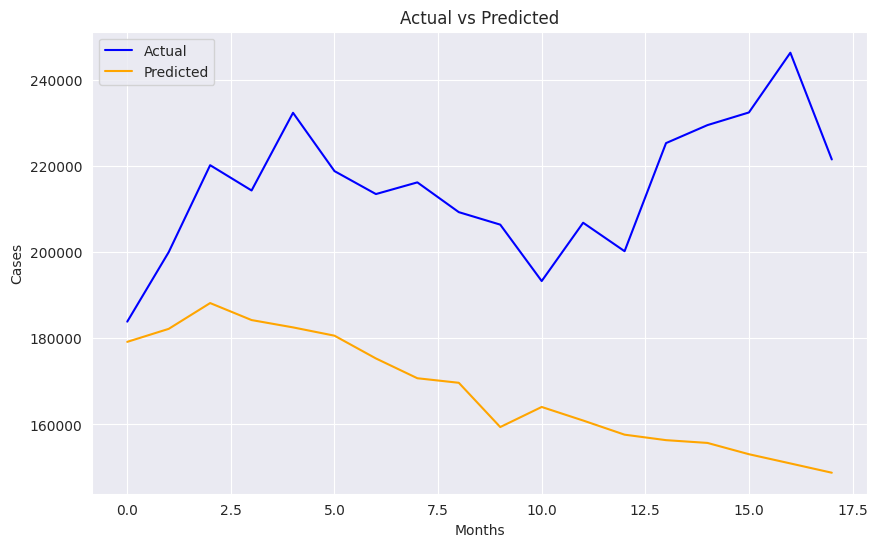

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual',color='blue')
plt.plot(pred, label='Predicted',color='orange')
plt.title('Actual vs Predicted')
plt.xlabel('Months')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [ ]:
print( len(train) + len(pred))

90


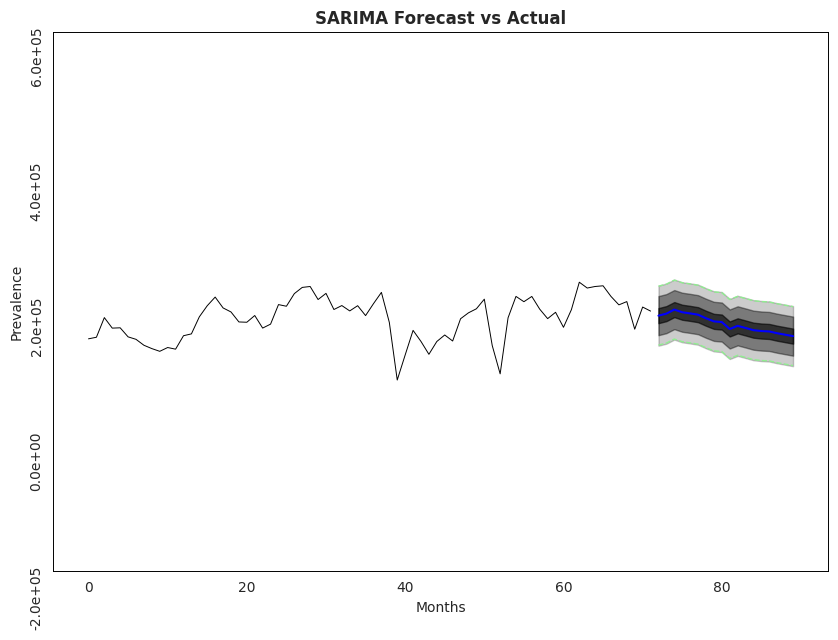

In [ ]:
import matplotlib.ticker as ticker
dates = df.index
# Compute standard deviation for credible interval
#forecast_std = np.std(test['Cases'].values - test_predictions) # Convert hybrid_pred to NumPy array
forecast_std = np.std(test - pred)
lower_bound = pred.flatten() - 1.96 * forecast_std  # Use .values to get NumPy array and then flatten
upper_bound = pred.flatten() + 1.96 * forecast_std  # Use .values to get NumPy array and then flatten

# Create index-based x-axis
#x_train = np.arange(len(train))  # Training data indices
#x_test = np.arange(len(train), len(train) + len(test))  # Test data indices
x_test = np.arange(len(train), len(train) + len(pred))  # Adjust x_test to match test_predictions


fig, ax = plt.subplots(figsize=(10, 7))  # Set figure size if needed
fig.patch.set_facecolor('white')  # Set figure background to white
ax.set_facecolor('white')  # Set plot area background to white
ax.grid(False)  # Remove grid

# Plot
# Plot training data
ax.plot(np.arange(len(train)), train, color='black', linewidth=0.7, label="Training Data")

# Plot test data and hybrid forecast
ax.plot(x_test, pred, color='blue', label="Hybrid Forecast")

# Plot credible interval
#ax.fill_between(x_test, lower_bound, upper_bound, color='gray', alpha=0.4, label="95% Credible Interval")

# Gradient effect for credible interval
# Create black-to-white gradient credible interval
for alpha, scale in zip([0.6, 0.4, 0.2], [0.5, 1.3, 2.0]):
    ax.fill_between(x_test,
                    pred.flatten() - scale * forecast_std,
                    pred.flatten() + scale * forecast_std,
                    color='black', alpha=alpha)

# Add green dotted boundary lines for the credible interval
ax.plot(x_test, lower_bound, color='lightgreen', linestyle='--', linewidth=1.0, label="Lower Bound")
ax.plot(x_test, upper_bound, color='lightgreen', linestyle='--', linewidth=1.0, label="Upper Bound")

# Set scientific notation on x-axis
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1e'))  # Format as scientific notation (1 decimal)
plt.xticks(rotation=360)
plt.yticks(rotation=90)
ax.set_yticks([-2e5, 0, 2e5, 4e5, 6e5])  # Only label these values
ax.tick_params(axis='y', labelsize=10)
#ax.set_xticks(rotation=360)
ax.set_ylim(-2e5, 6e5)

# Add outline (border) on all four sides
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color to black
    spine.set_linewidth(0.7)  # Adjust thickness of the border

#ax.plot(dates[:train.shape[0]], train['Cases'].values, color='gray',linewidth=0.5, label="Training Data")
#plt.plot(dates[train.shape[0]:], test['Cases'].values, color='green', label="Test Data") # Use train.shape[0] for training data size
#ax.plot(dates[train.shape[0]:], hybrid_pred.values, color='blue', label="Hybrid Forecast") # Convert hybrid_pred to NumPy
#ax.fill_between(dates[train.shape[0]:], lower_bound, upper_bound, color='gray', alpha=0.4, label="95% Credible Interval") # Use train.shape[0] for training data size
ax.set_title("SARIMA Forecast vs Actual", fontsize=12,fontweight='bold')
ax.set_xlabel("Months")
ax.set_ylabel("Prevalence")
plt.show()